In [1]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import scienceplots

plt.style.use('science')

ASSETS = "../assets/"
DATA = "../data/"
LINE_COLOR='#1B4244'

FOLDER = '../data/20250323/'

In [2]:
import pandas as pd
import json

# Load the JSON data from the provided file path
file_path = FOLDER+'hash-rate.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract hash-rate and market-price data
hash_rate_data = data['hash-rate']
market_price_data = data['market-price']

# Create separate DataFrames for hash-rate and market-price
hash_rate_df = pd.DataFrame(hash_rate_data)
market_price_df = pd.DataFrame(market_price_data)

# Rename columns for clarity
hash_rate_df.columns = ['timestamp', 'hash_rate']
market_price_df.columns = ['timestamp', 'market_price']

# Convert timestamp to datetime format
hash_rate_df['timestamp'] = pd.to_datetime(hash_rate_df['timestamp'], unit='ms')
market_price_df['timestamp'] = pd.to_datetime(market_price_df['timestamp'], unit='ms')

# Merge the two DataFrames on timestamp
merged_df = pd.merge(hash_rate_df, market_price_df, on='timestamp', how='outer')


In [3]:
# Load the JSON data from the new provided file path
file_path_total_bitcoins = FOLDER+'total-bitcoins.json'
with open(file_path_total_bitcoins, 'r') as file:
    data_total_bitcoins = json.load(file)

# Extract total-bitcoins and market-price data
total_bitcoins_data = data_total_bitcoins['total-bitcoins']

# Create separate DataFrames for total-bitcoins and market-price
total_bitcoins_df = pd.DataFrame(total_bitcoins_data)

# Rename columns for clarity
total_bitcoins_df.columns = ['timestamp', 'total_bitcoins']

# Convert timestamp to datetime format
total_bitcoins_df['timestamp'] = pd.to_datetime(total_bitcoins_df['timestamp'], unit='ms')


In [4]:
# Load the JSON data from the new provided file path
file_path_tran_fee = FOLDER+'transaction-fees.json'
with open(file_path_tran_fee, 'r') as file:
    data_tran_fee = json.load(file)

# Extract total-bitcoins and market-price data
tran_fee_data = data_tran_fee['transaction-fees']

# Create separate DataFrames for total-bitcoins and market-price
tran_fee_df = pd.DataFrame(tran_fee_data)

# Rename columns for clarity
tran_fee_df.columns = ['timestamp', 'daily_transaction_fees']

# Convert timestamp to datetime format
tran_fee_df['timestamp'] = pd.to_datetime(tran_fee_df['timestamp'], unit='ms')
tran_fee_df.set_index('timestamp', inplace=True)

C:\Users\pkapl\AppData\Local\Temp\ipykernel_18704\1867475990.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


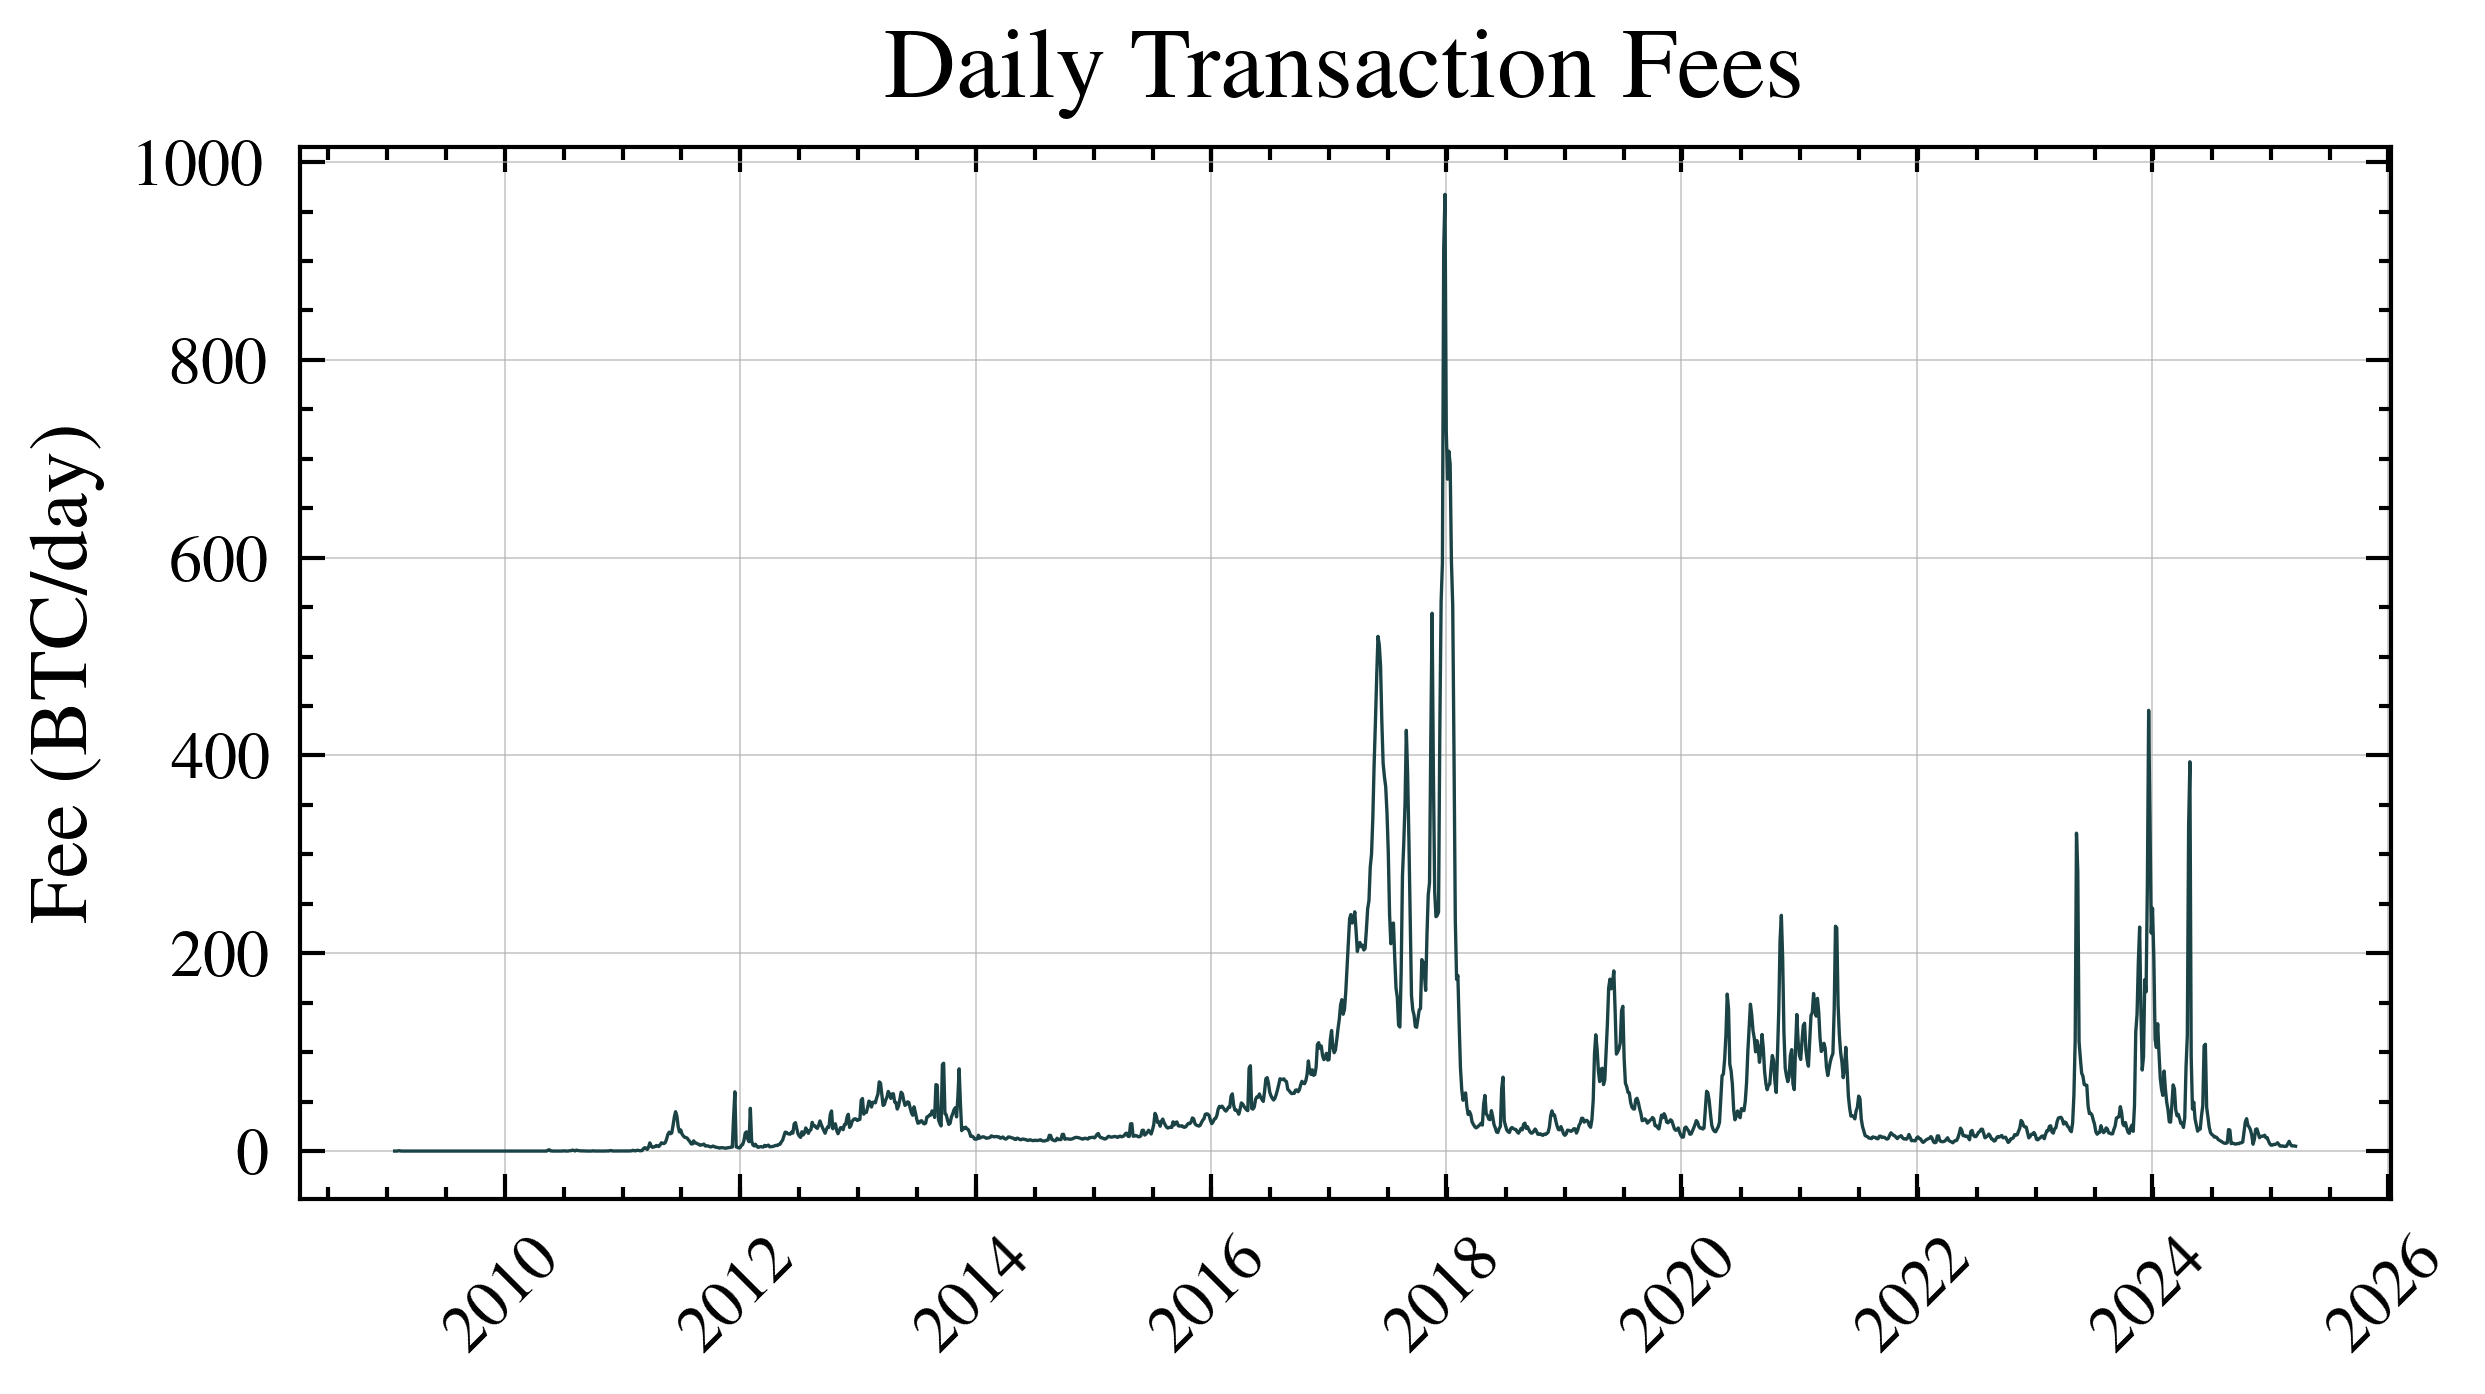

In [5]:
with plt.style.context(['science','ieee']):
    plt.figure(figsize=(4, 2.25))
    plt.grid(True, linestyle='-', alpha=0.7, linewidth=0.2)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.plot(tran_fee_df.index, tran_fee_df["daily_transaction_fees"],color=LINE_COLOR, linewidth=0.4)
    plt.title('Daily Transaction Fees', fontsize=12)
    plt.ylabel('Fee (BTC/day)', fontsize=10)
    plt.legend()
    plt.savefig(ASSETS+'transactionfees1.png')
    plt.show()

In [6]:
merged_df.set_index('timestamp', inplace=True)
total_bitcoins_df.set_index('timestamp', inplace=True)
merged_df= merged_df.resample('W-SUN').mean()
total_bitcoins_df=total_bitcoins_df.resample('W-SUN').mean()
tran_fee_df=tran_fee_df.resample('D').ffill().resample('W-SUN').mean()

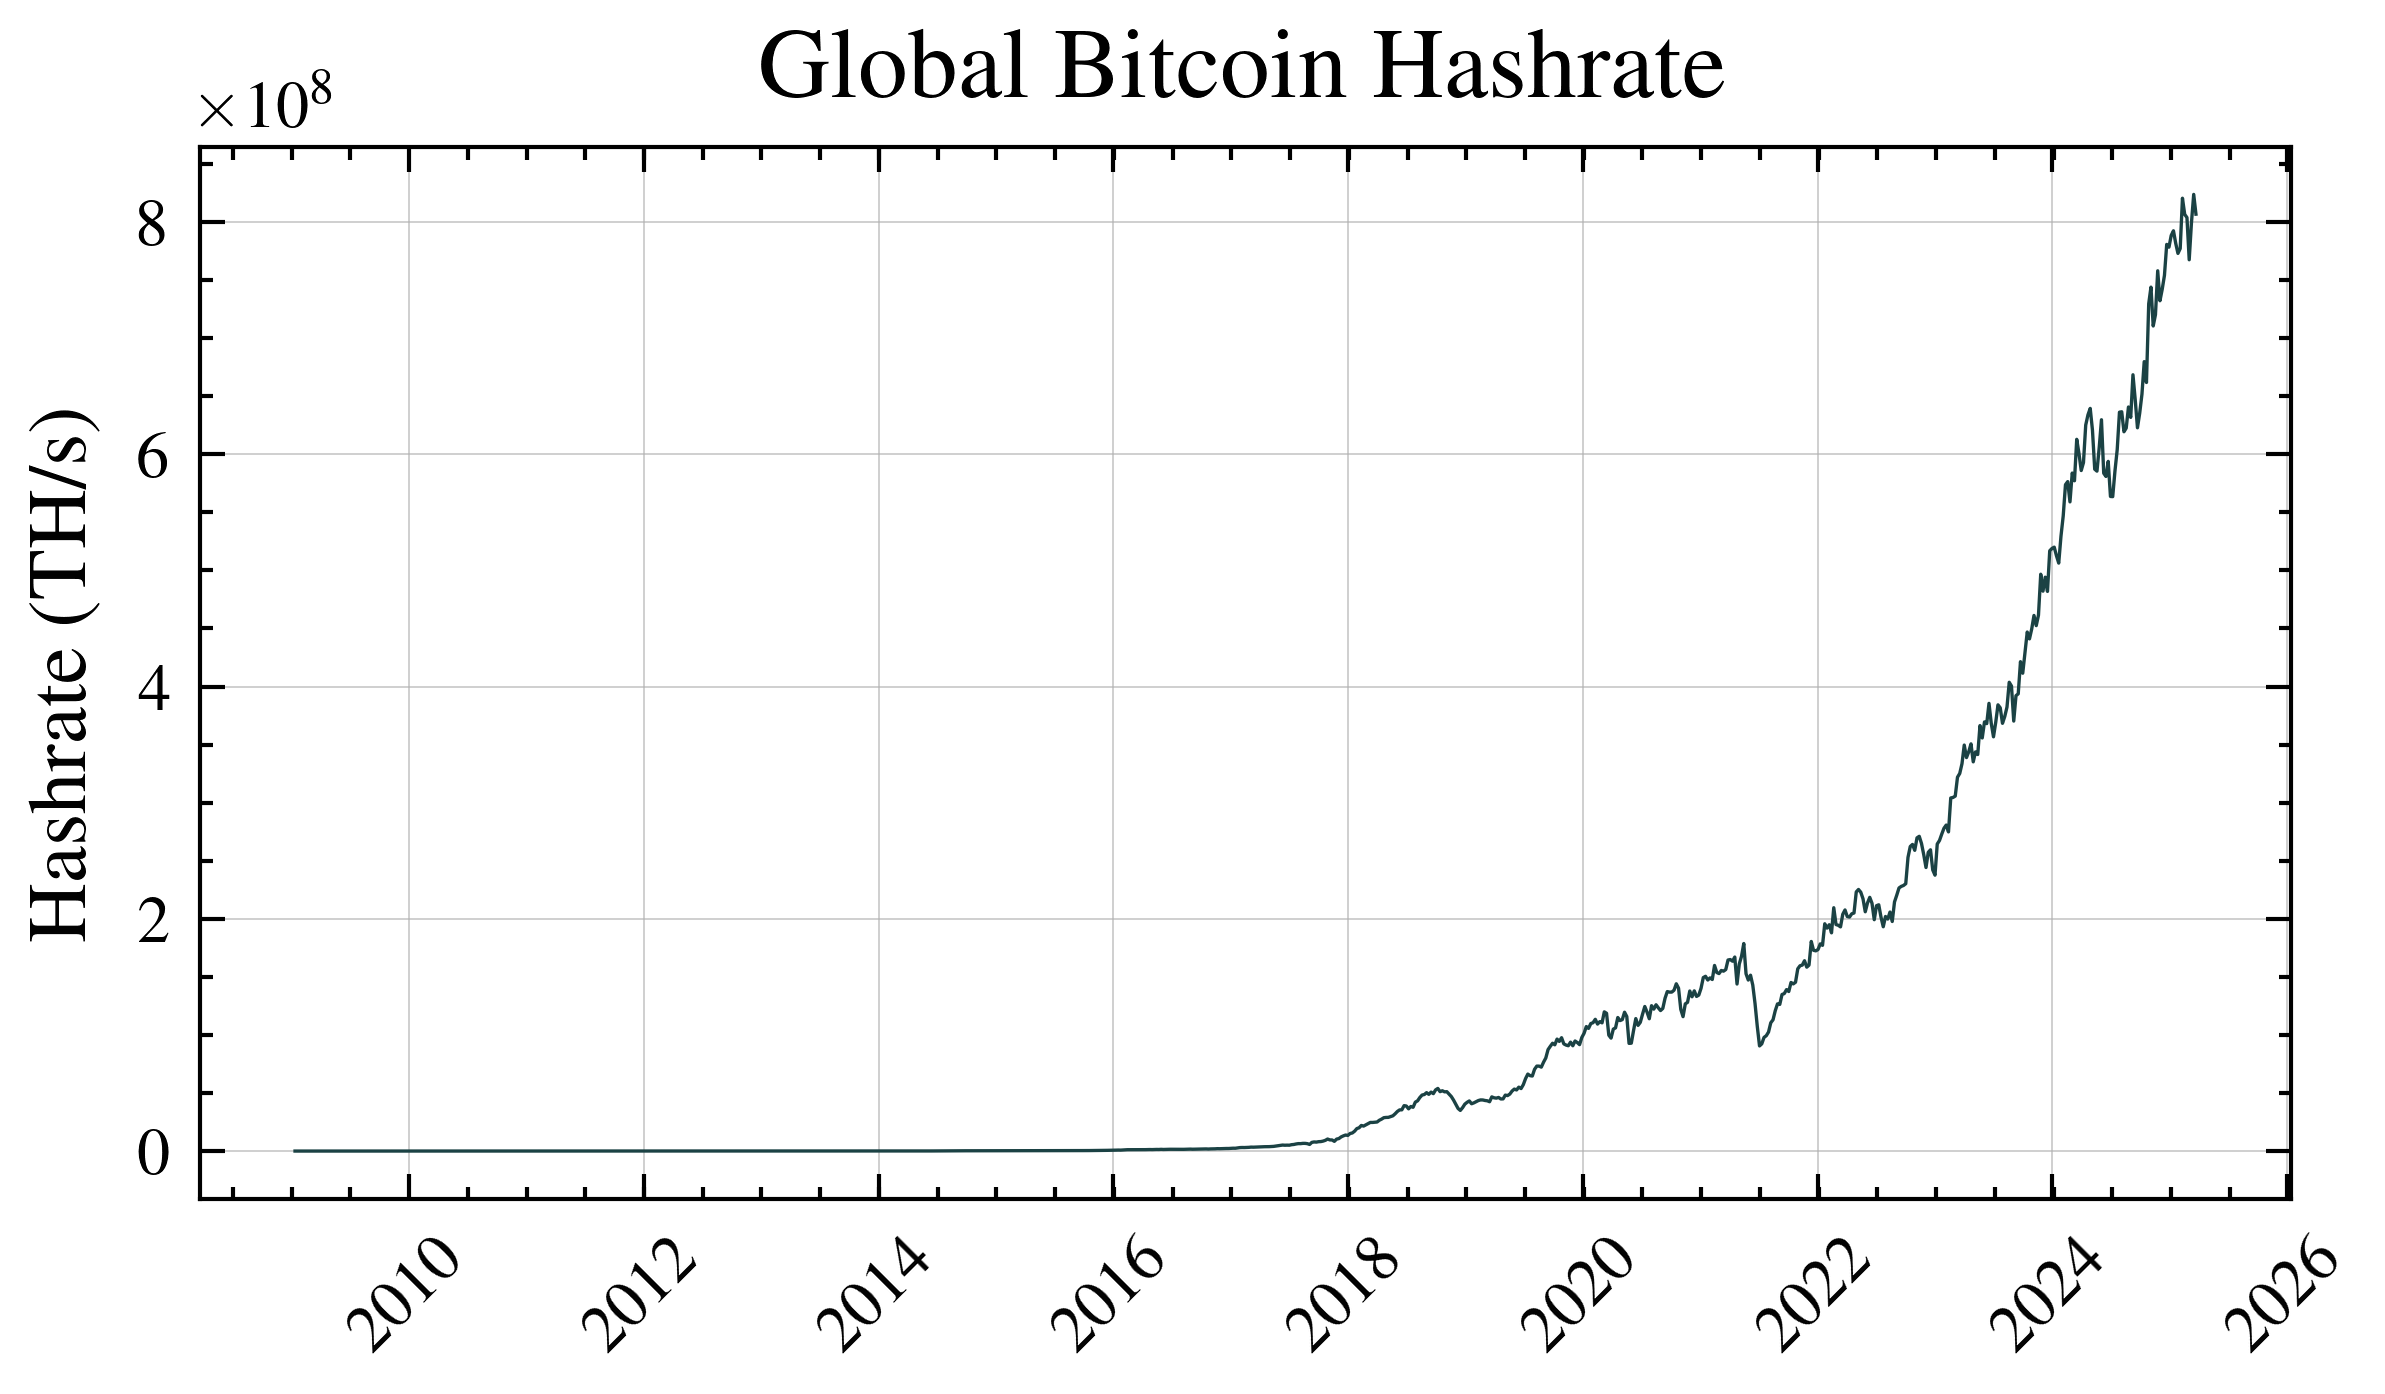

In [7]:
with plt.style.context(['science','ieee']):
    plt.figure(figsize=(4, 2.25))
    plt.grid(True, linestyle='-', alpha=0.7, linewidth=0.2)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.plot(merged_df["hash_rate"].index, merged_df["hash_rate"],color=LINE_COLOR, linewidth=0.4)
    plt.title('Global Bitcoin Hashrate', fontsize=12)
    plt.ylabel('Hashrate (TH/s)', fontsize=10)
    plt.savefig(ASSETS+'hashrate1.png')
    plt.show()

In [8]:
# prompt: merge merged_df and total_bitcoins_df

onchain_df = pd.merge(merged_df,tran_fee_df, left_index=True, right_index=True, how='inner')
onchain_df.to_csv(DATA+'onchain.csv')

In [9]:
import pandas as pd

def create_btc_time_series():
    # Define the data as lists
    years = [
        2009, 2012, 2016, 2020, 2024, 2028, 2032, 2036, 2040, 2044, 2048,
        2052, 2056, 2060, 2064, 2068, 2072, 2076, 2080, 2084, 2088, 2092,
        2096, 2100, 2104, 2108, 2112, 2116, 2120, 2124, 2128, 2132, 2136, 2140
    ]

    block_reward = [
        50, 25, 12.5, 6.25, 3.125, 1.5625, 0.78125, 0.390625, 0.1953125,
        0.09765625, 0.048828125, 0.024414063, 0.012207031, 0.006103516,
        0.003051758, 0.001525879, 0.000762939, 0.00038147, 0.000190735,
        0.000095367, 0.000047684, 0.000023842, 0.000011921, 0.00000596,
        0.00000298, 0.00000149, 0.00000075, 0.00000037, 0.00000019,
        0.00000009, 0.00000005, 0.00000002, 0.00000001, 0.00000001
    ]

    total_btc_mined = [
        0, 10500000, 15750000, 18375000, 19687500, 20343750, 20671875,
        20835937.5, 20917968.75, 20958984.375, 20979492.1875, 20989746.09375,
        20994873.046875, 20997436.5234375, 20998718.26171875, 20999359.130859375,
        20999679.565429688, 20999839.782714844, 20999919.891357422,
        20999959.945678711, 20999979.972839355, 20999989.986419678,
        20999994.993209839, 20999997.496604919, 20999998.74830246,
        20999999.37415123, 20999999.687075615, 20999999.843537807,
        20999999.921768904, 20999999.960884452, 20999999.980442226,
        20999999.990221113, 20999999.995110556, 21000000
    ]

    new_btc_mined = [
        0, 10500000, 5250000, 2625000, 1312500, 656250, 328125, 164062.5,
        82031.25, 41015.625, 20507.8125, 10253.90625, 5126.953125,
        2563.4765625, 1281.73828125, 640.869140625, 320.4345703125,
        160.21728515625, 80.108642578125, 40.0543212890625, 20.02716064453125,
        10.013580322265625, 5.0067901611328125, 2.5033950805664062,
        1.2516975402832031, 0.6258487701416016, 0.3129243850708008,
        0.1564621925354004, 0.0782310962677002, 0.0391155481338501,
        0.01955777406692505, 0.009778887033462525, 0.0048894435167312625,
        0.0048894435167312625
    ]

    pct_all_btc_mined = [
        "0.00%", "50.00%", "75.00%", "87.50%", "93.75%", "96.88%", "98.44%",
        "99.22%", "99.61%", "99.80%", "99.90%", "99.95%", "99.98%", "99.99%",
        "99.994%", "99.997%", "99.998%", "99.999%", "99.9996%", "99.9998%",
        "99.9999%", "99.99995%", "99.99998%", "99.99999%", "99.999994%",
        "99.999997%", "99.999999%", "99.9999993%", "99.9999996%",
        "99.9999998%", "99.9999999%", "99.99999995%", "99.99999998%", "100.00%"
    ]

    # Create a DataFrame from the data
    df = pd.DataFrame({
        'Year': years,
        'Block Reward': block_reward,
        'Total BTC Mined': total_btc_mined,
        'New BTC Mined': new_btc_mined,
        '% of All BTC Mined': pct_all_btc_mined
    })

    # Convert the 'Year' column to a datetime column representing January 1 of that year
    df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-01-01')

    # Set the datetime column as the index and drop the 'Year' column if desired
    df.set_index('Date', inplace=True)
    df.drop(columns='Year', inplace=True)

    return df

In [10]:
sim_btc = create_btc_time_series()
sim_btc

,Block Reward,Total BTC Mined,New BTC Mined,% of All BTC Mined
Date,,,,
2009-01-01,5.000000e+01,0.000000e+00,0.000000e+00,0.00%
2012-01-01,2.500000e+01,1.050000e+07,1.050000e+07,50.00%
2016-01-01,1.250000e+01,1.575000e+07,5.250000e+06,75.00%
2020-01-01,6.250000e+00,1.837500e+07,2.625000e+06,87.50%
2024-01-01,3.125000e+00,1.968750e+07,1.312500e+06,93.75%
2028-01-01,1.562500e+00,2.034375e+07,6.562500e+05,96.88%
2032-01-01,7.812500e-01,2.067188e+07,3.281250e+05,98.44%
2036-01-01,3.906250e-01,2.083594e+07,1.640625e+05,99.22%
2040-01-01,1.953125e-01,2.091797e+07,8.203125e+04,99.61%


In [11]:
sim_btc_res= sim_btc[['Total BTC Mined']].resample('D').interpolate(method='linear').resample('W-SUN').mean()

In [12]:
sim_btc_res.rename(columns={'Total BTC Mined':'total_bitcoins'}).to_csv(DATA+'simulated_bitcoins.csv')

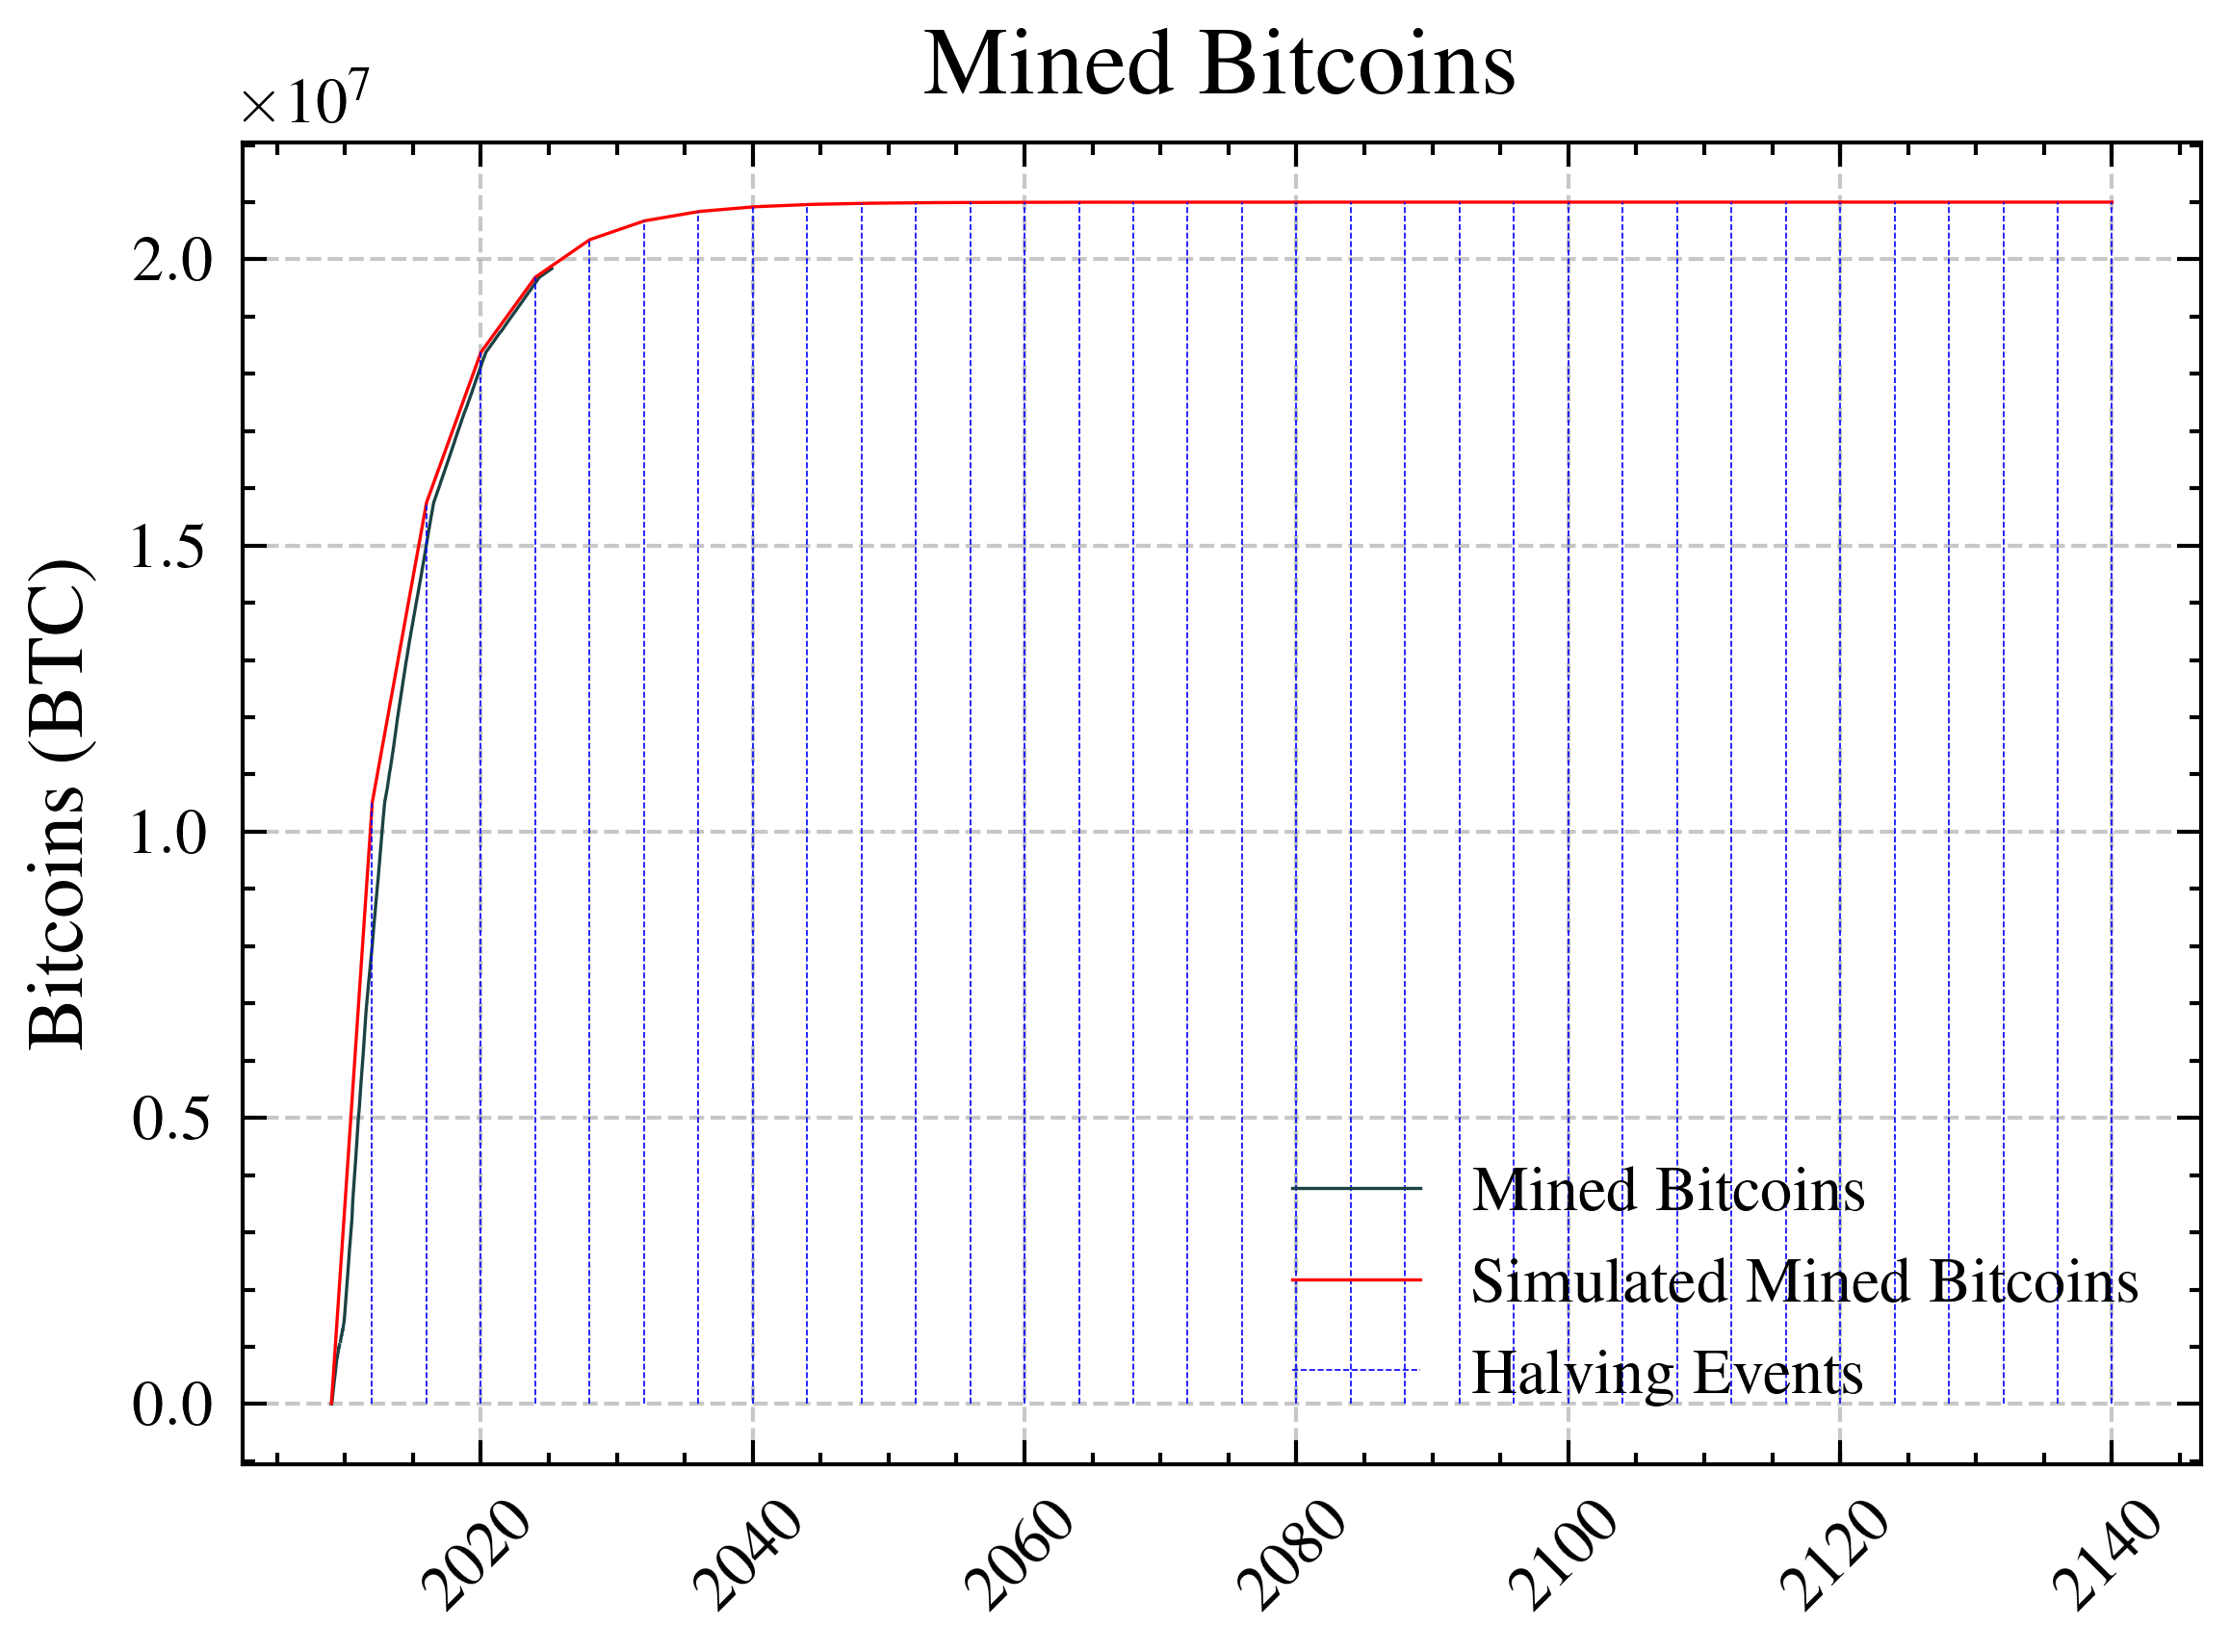

In [13]:
with plt.style.context(['science','ieee']):
    plt.figure(figsize=(4, 3))
    plt.plot(total_bitcoins_df.index, total_bitcoins_df['total_bitcoins'], label='Mined Bitcoins', linewidth=0.4, color=LINE_COLOR)
    plt.plot(sim_btc_res.index, sim_btc_res['Total BTC Mined'], 'r-', label='Simulated Mined Bitcoins' , linewidth=0.4)
    plt.vlines(sim_btc.index,0,sim_btc['Total BTC Mined'], colors='b', linestyles='dashed', label='Halving Events', linewidth=0.2)

    plt.title('Mined Bitcoins', fontsize=12)
    plt.ylabel('Bitcoins (BTC)', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add some padding to prevent label cutoff
    plt.tight_layout()
    plt.show()

In [14]:
future_bitcoins = sim_btc_res[total_bitcoins_df.index[-1]:][['Total BTC Mined']].rename(columns={'Total BTC Mined': 'total_bitcoins'})

In [15]:
delta = total_bitcoins_df["total_bitcoins"][-1]-future_bitcoins['total_bitcoins'][0]
total_bitcoins_df["total_bitcoins"][-1],future_bitcoins['total_bitcoins'][0]

C:\Users\pkapl\AppData\Local\Temp\ipykernel_18704\979905648.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta = total_bitcoins_df["total_bitcoins"][-1]-future_bitcoins['total_bitcoins'][0]
C:\Users\pkapl\AppData\Local\Temp\ipykernel_18704\979905648.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_bitcoins_df["total_bitcoins"][-1],future_bitcoins['total_bitcoins'][0]


(np.float64(19838798.4375), np.float64(19886935.318275154))

In [16]:
future_bitcoins['total_bitcoins'] = future_bitcoins['total_bitcoins']+delta

In [17]:
total_bitcoins_df["total_bitcoins"][-1],future_bitcoins['total_bitcoins'][0]

C:\Users\pkapl\AppData\Local\Temp\ipykernel_18704\1049246735.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_bitcoins_df["total_bitcoins"][-1],future_bitcoins['total_bitcoins'][0]


(np.float64(19838798.4375), np.float64(19838798.4375))

In [18]:
total_bitcoins_df = pd.concat([total_bitcoins_df, future_bitcoins[1:]], axis=0)

In [19]:
difff=sim_btc_res.diff()

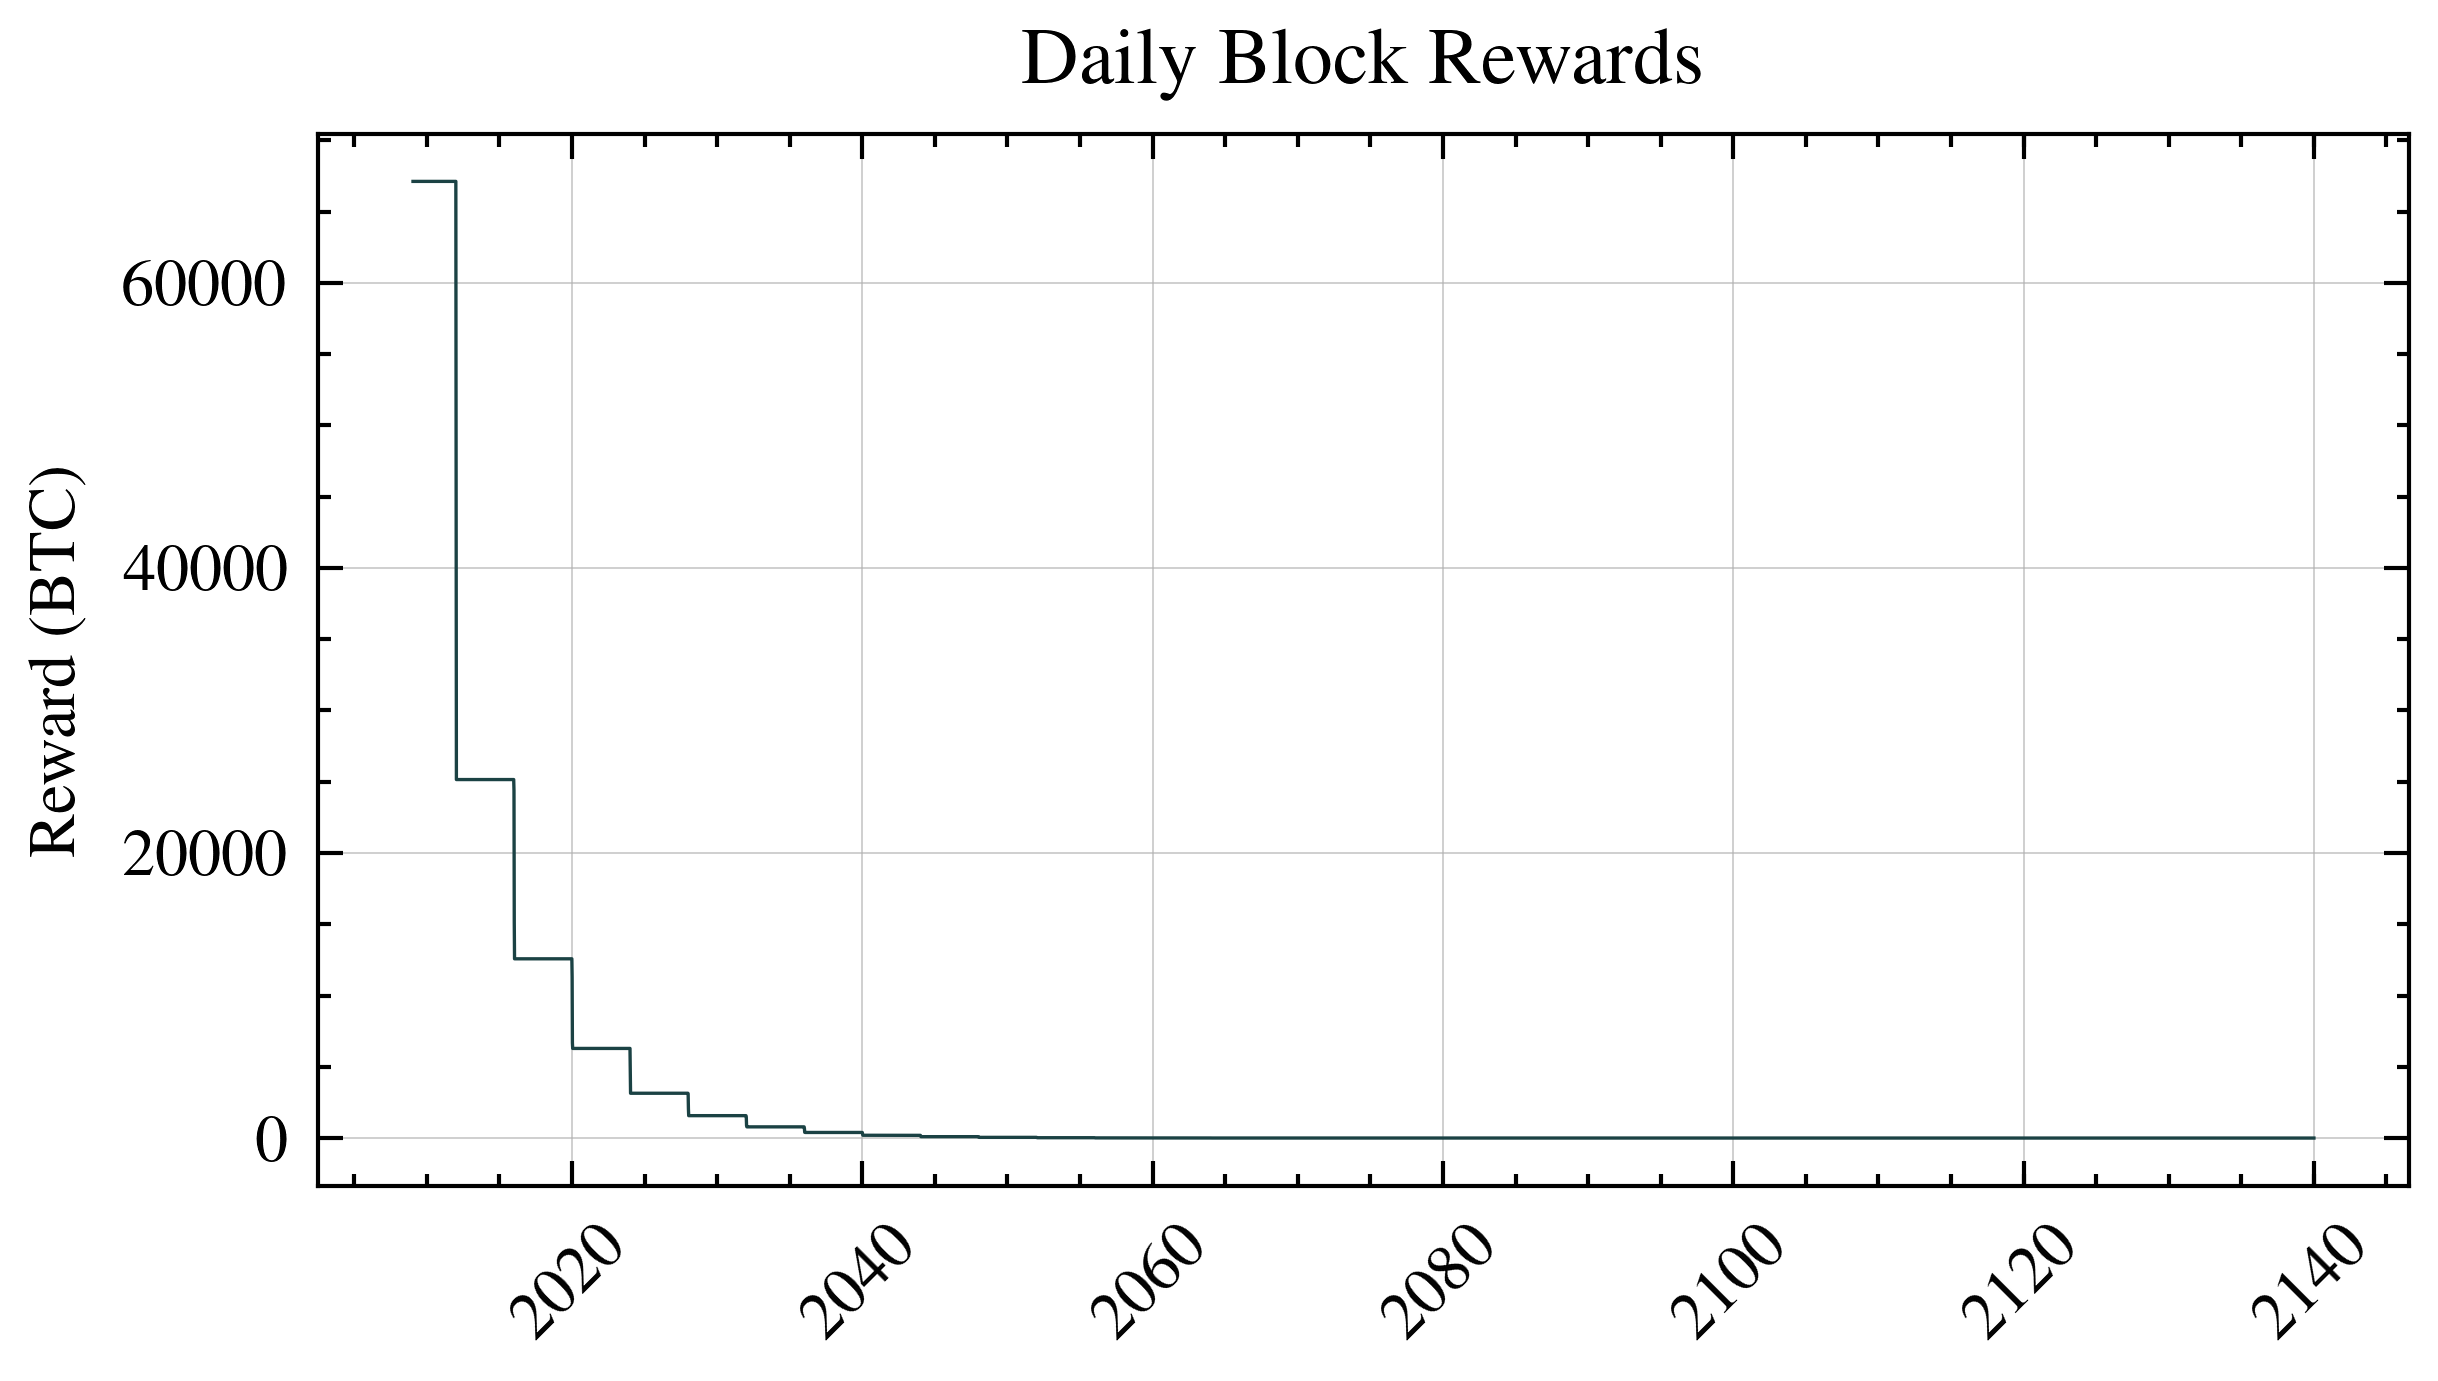

In [20]:
with plt.style.context(['science','ieee']):
    plt.figure(figsize=(4, 2.25))
    plt.grid(True, linestyle='-', alpha=0.7, linewidth=0.2)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.plot(difff.index[2:], difff['Total BTC Mined'][2:], color=LINE_COLOR, linewidth=0.4)
    plt.ylabel('Reward (BTC)')
    plt.title('Daily Block Rewards')
    plt.savefig(ASSETS+'blockrewards1.png')
    plt.show()

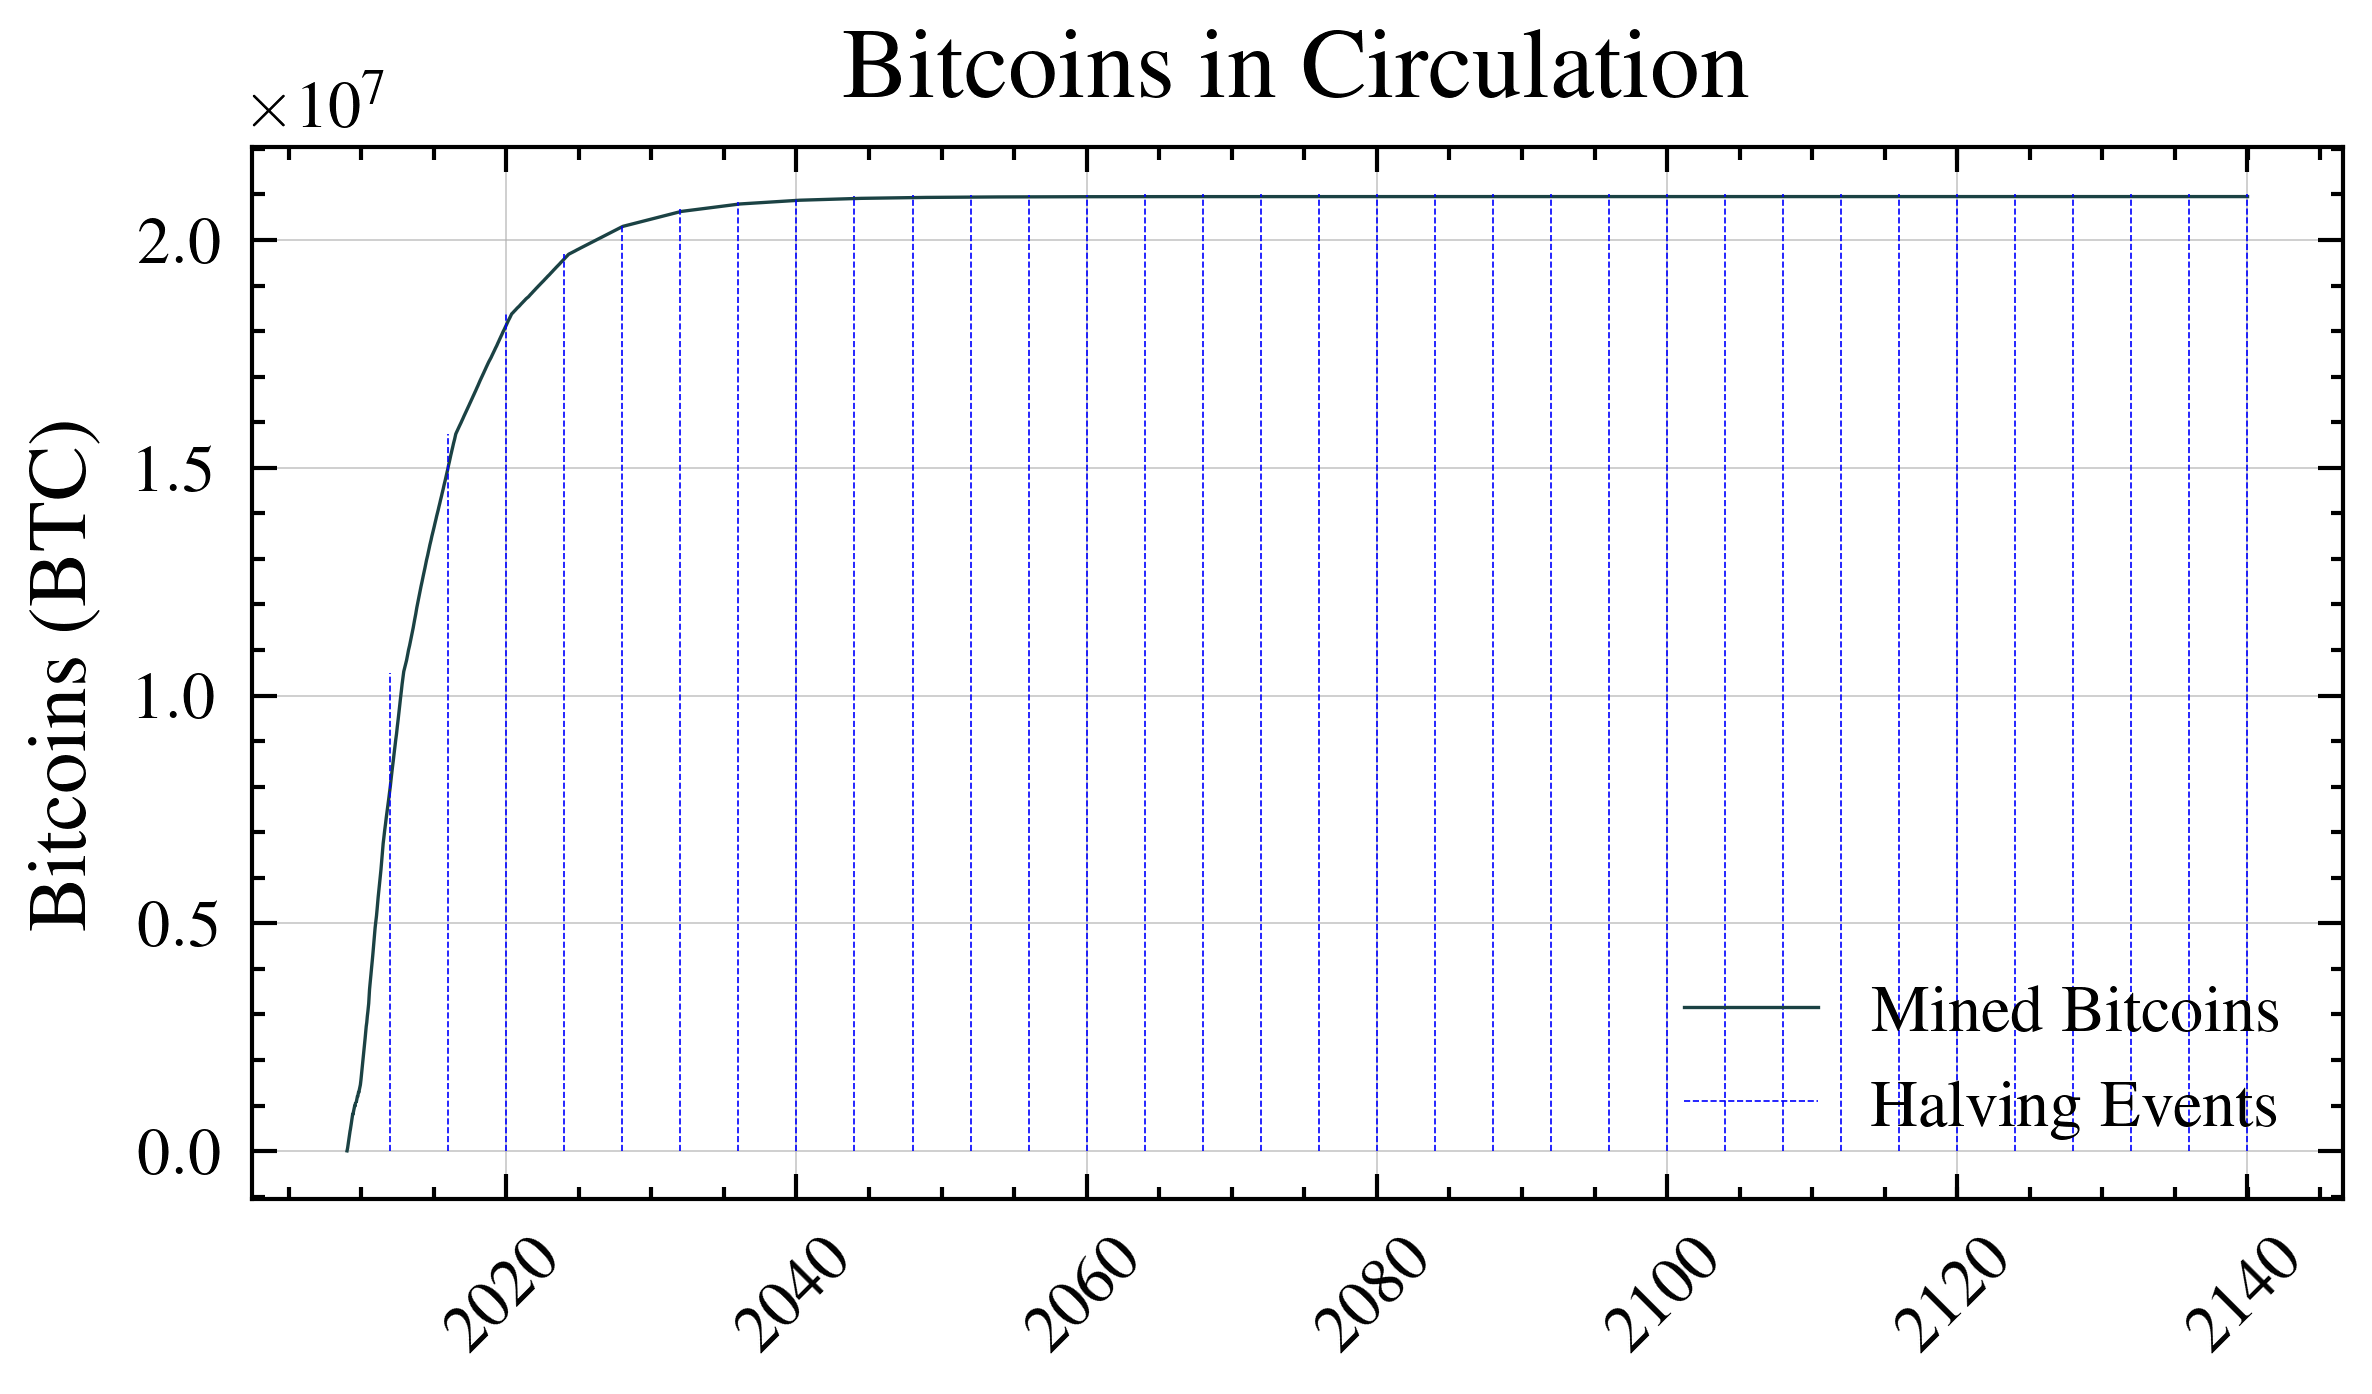

In [21]:
with plt.style.context(['science','ieee']):
    plt.figure(figsize=(4, 2.25))
    plt.grid(True, linestyle='-', alpha=0.7, linewidth=0.2)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.plot(total_bitcoins_df.index, total_bitcoins_df['total_bitcoins'],color=LINE_COLOR, linewidth=0.4, label='Mined Bitcoins')
    plt.vlines(sim_btc.index,0,sim_btc['Total BTC Mined'], colors='b', linestyles='dashed', label='Halving Events', linewidth=0.2)
    plt.title('Bitcoins in Circulation', fontsize=12)
    plt.ylabel('Bitcoins (BTC)', fontsize=10)
    plt.legend()
    plt.savefig(ASSETS+'minedbitcoin1.png')
    plt.show()

In [22]:
total_bitcoins_df.to_csv(DATA+'total_bitcoins.csv')